<a href="https://colab.research.google.com/github/DHEEPAK-RAAJ-R/Machine-Learning/blob/main/Titanic_toy_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing the required libraries
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [ ]:
# Reading the csv file and putting it into 'df' object
df = pd.read_csv('/content/train_and_test2.csv')
df

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,...,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,28.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1305,1306,39.0,108.9000,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,0
1306,1307,38.5,7.2500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1307,1308,28.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0


In [ ]:
df.describe()

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.0,1309.0,1309.0,1309.0,1309.0,...,1309.0,1309.0,1309.0,1309.000000,1309.0,1309.0,1307.000000,1309.0,1309.0,1309.000000
mean,655.000000,29.503186,33.281086,0.355997,0.498854,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.294882,0.0,0.0,1.492731,0.0,0.0,0.261268
std,378.020061,12.905241,51.741500,0.478997,1.041658,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.837836,0.0,0.0,0.814626,0.0,0.0,0.439494
min,1.000000,0.170000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.000000,0.0,0.0,0.000000,0.0,0.0,0.000000
25%,328.000000,22.000000,7.895800,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.000000,0.0,0.0,1.000000,0.0,0.0,0.000000
50%,655.000000,28.000000,14.454200,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.000000,0.0,0.0,2.000000,0.0,0.0,0.000000
75%,982.000000,35.000000,31.275000,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.000000,0.0,0.0,2.000000,0.0,0.0,1.000000
max,1309.000000,80.000000,512.329200,1.000000,8.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.000000,0.0,0.0,2.000000,0.0,0.0,1.000000


In [ ]:
df=df.drop(columns=['zero','zero.1','zero.2','zero.3','zero.4','zero.5','zero.6','zero.7','zero.8','zero.9','zero.10','zero.11','zero.12','zero.13','zero.14','zero.15','zero.16','zero.17','zero.18'])

In [ ]:
df

,Passengerid,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,2urvived
0,1,22.0,7.2500,0,1,0,3,2.0,0
1,2,38.0,71.2833,1,1,0,1,0.0,1
2,3,26.0,7.9250,1,0,0,3,2.0,1
3,4,35.0,53.1000,1,1,0,1,2.0,1
4,5,35.0,8.0500,0,0,0,3,2.0,0
...,...,...,...,...,...,...,...,...,...
1304,1305,28.0,8.0500,0,0,0,3,2.0,0
1305,1306,39.0,108.9000,1,0,0,1,0.0,0
1306,1307,38.5,7.2500,0,0,0,3,2.0,0
1307,1308,28.0,8.0500,0,0,0,3,2.0,0


In [ ]:
df=df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1307 entries, 0 to 1308
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passengerid  1307 non-null   int64  
 1   Age          1307 non-null   float64
 2   Fare         1307 non-null   float64
 3   Sex          1307 non-null   int64  
 4   sibsp        1307 non-null   int64  
 5   Parch        1307 non-null   int64  
 6   Pclass       1307 non-null   int64  
 7   Embarked     1307 non-null   float64
 8   2urvived     1307 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 102.1 KB


In [ ]:
df.isnull().sum()

Passengerid    0
Age            0
Fare           0
Sex            0
sibsp          0
Parch          0
Pclass         0
Embarked       0
2urvived       0
dtype: int64

In [ ]:
df.shape

(1307, 9)

In [ ]:
corr=df.corr()

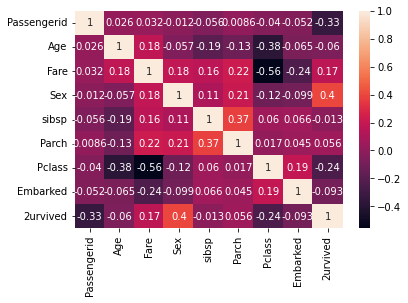

In [ ]:
sns.heatmap(corr,annot=True)


In [ ]:
df.rename(columns={'2urvived':'Survived'},inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df

,Passengerid,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,Survived
0,1,22.0,7.2500,0,1,0,3,2.0,0
1,2,38.0,71.2833,1,1,0,1,0.0,1
2,3,26.0,7.9250,1,0,0,3,2.0,1
3,4,35.0,53.1000,1,1,0,1,2.0,1
4,5,35.0,8.0500,0,0,0,3,2.0,0
...,...,...,...,...,...,...,...,...,...
1304,1305,28.0,8.0500,0,0,0,3,2.0,0
1305,1306,39.0,108.9000,1,0,0,1,0.0,0
1306,1307,38.5,7.2500,0,0,0,3,2.0,0
1307,1308,28.0,8.0500,0,0,0,3,2.0,0


In [ ]:
X = df.drop('Survived',axis=1)
y = df['Survived']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
X_train.shape, X_test.shape

((914, 8), (393, 8))

In [ ]:
from sklearn.ensemble import RandomForestClassifier

classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5, n_estimators=100, oob_score=True)

In [ ]:
%%time
classifier_rf.fit(X_train, y_train)

CPU times: user 286 ms, sys: 39.3 ms, total: 326 ms
Wall time: 293 ms


RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [ ]:
classifier_rf.oob_score_

0.8719912472647703

In [ ]:
classifier_rf.score(X_test, y_test)

0.8371501272264631

**Grid Search for Parameter Finetuning**

In [ ]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [ ]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid_search = GridSearchCV(estimator=rf, param_grid=params, cv = 4, n_jobs=-1, verbose=1, scoring="accuracy")

In [ ]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits
CPU times: user 4.59 s, sys: 255 ms, total: 4.84 s
Wall time: 1min 56s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [ ]:
grid_search.best_score_

0.8741716463648204

In [ ]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_estimators=50,
                       n_jobs=-1, random_state=42)

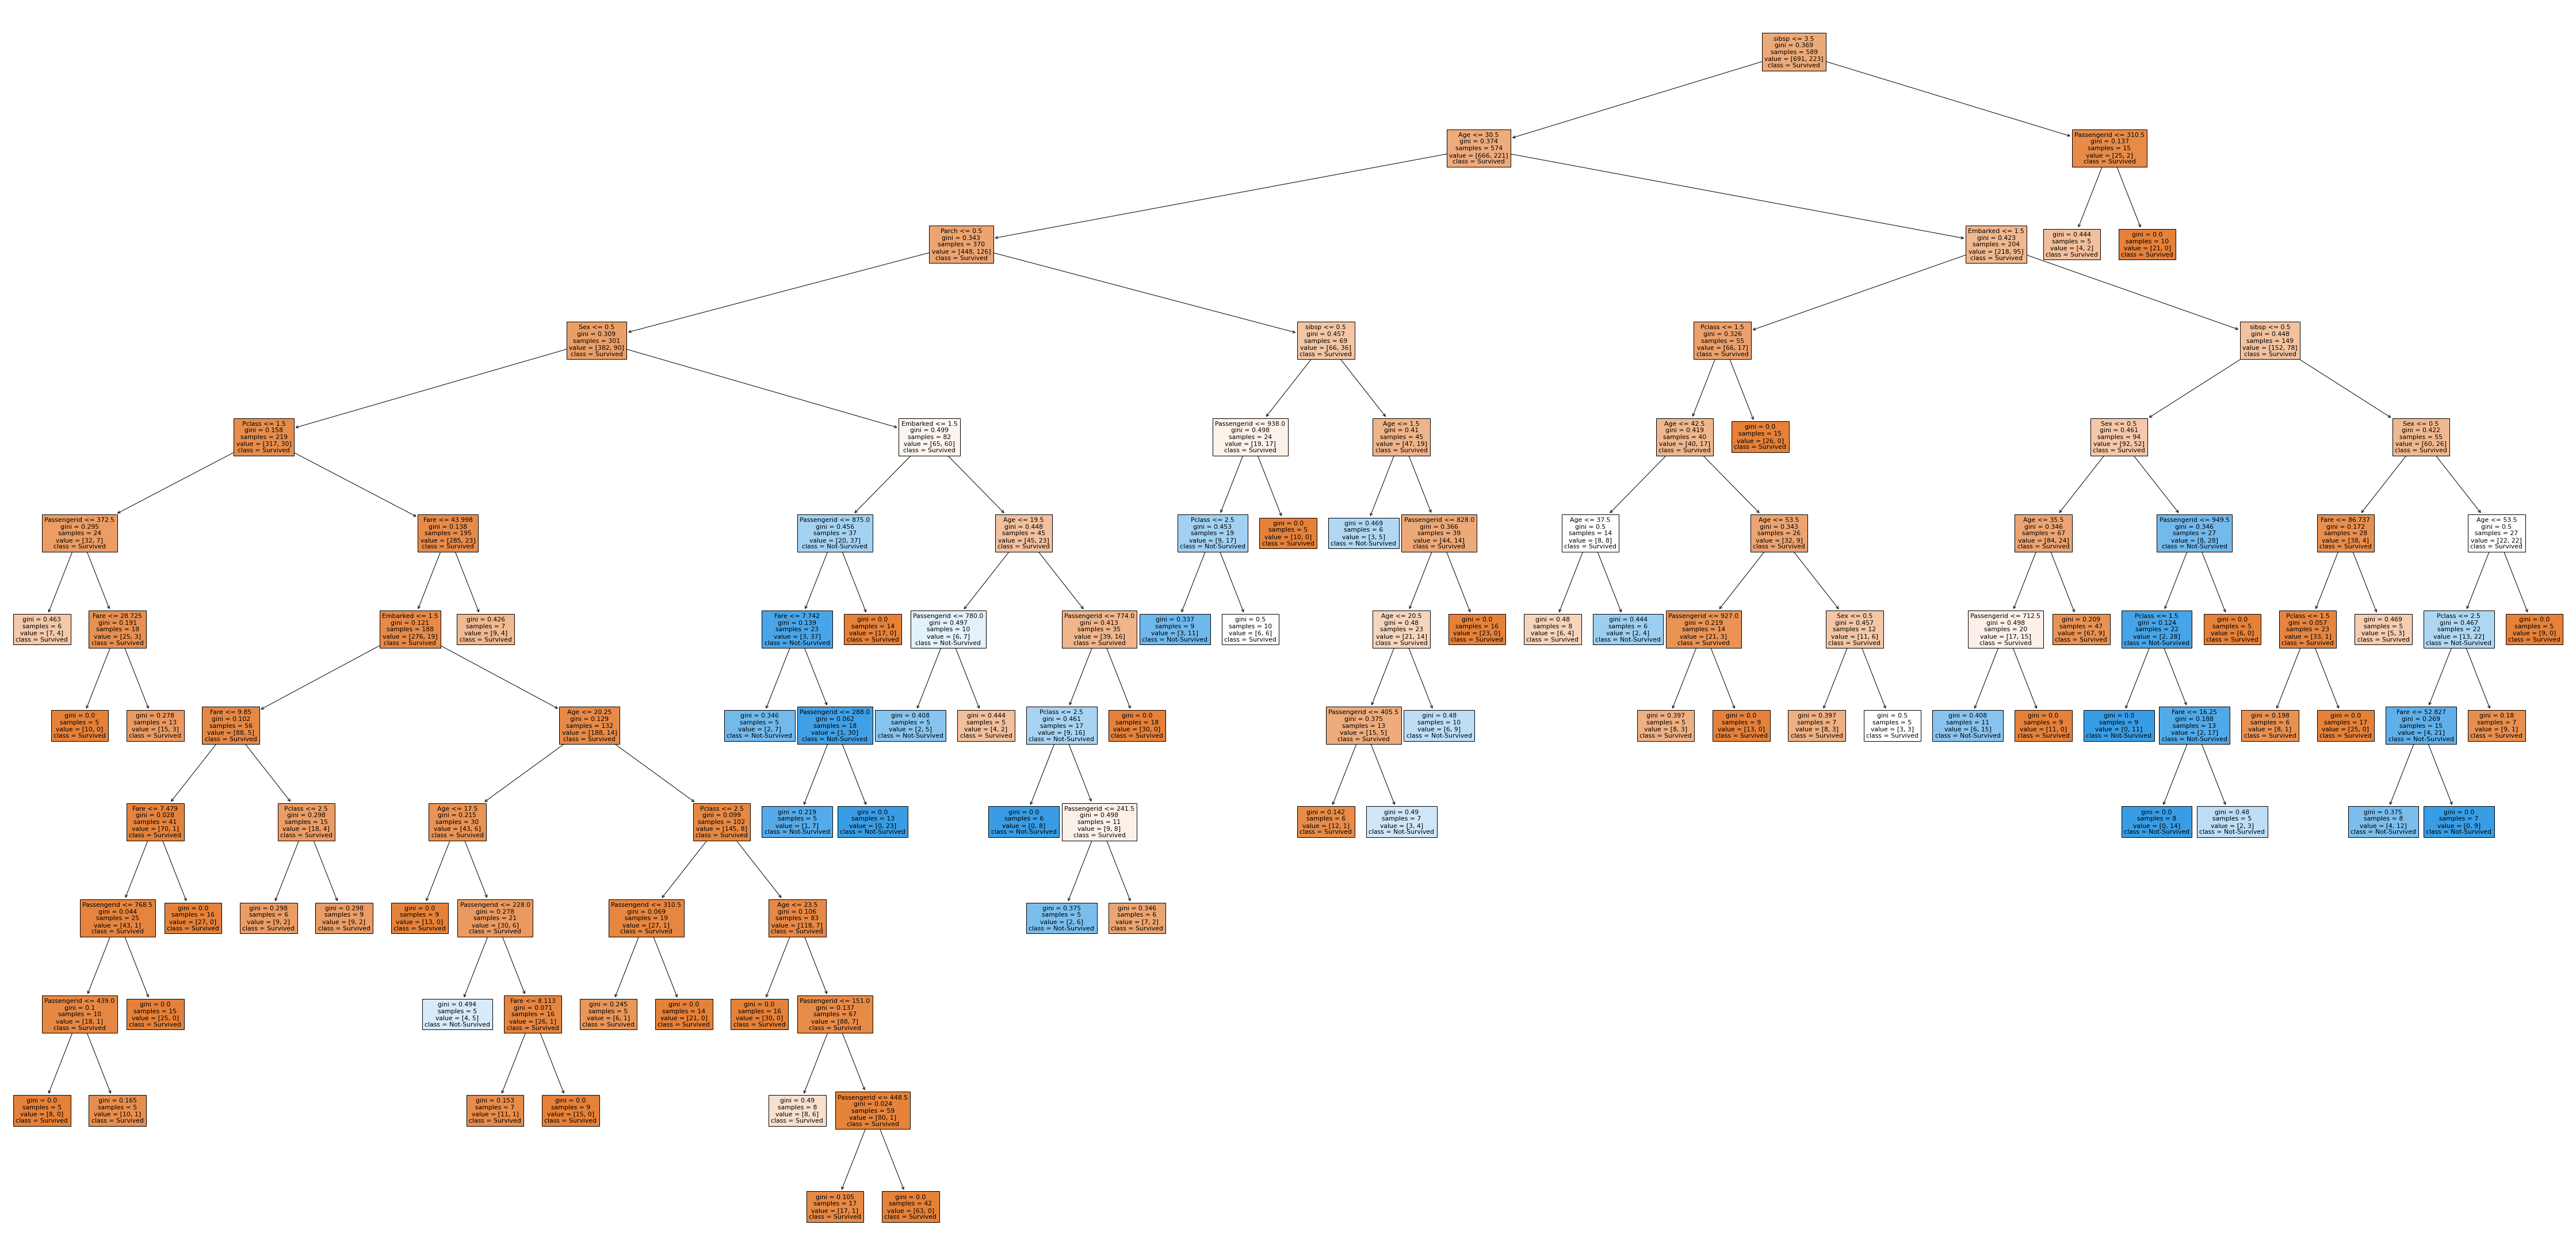

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[9], feature_names = X.columns,class_names=['Survived', "Not-Survived"],filled=True);

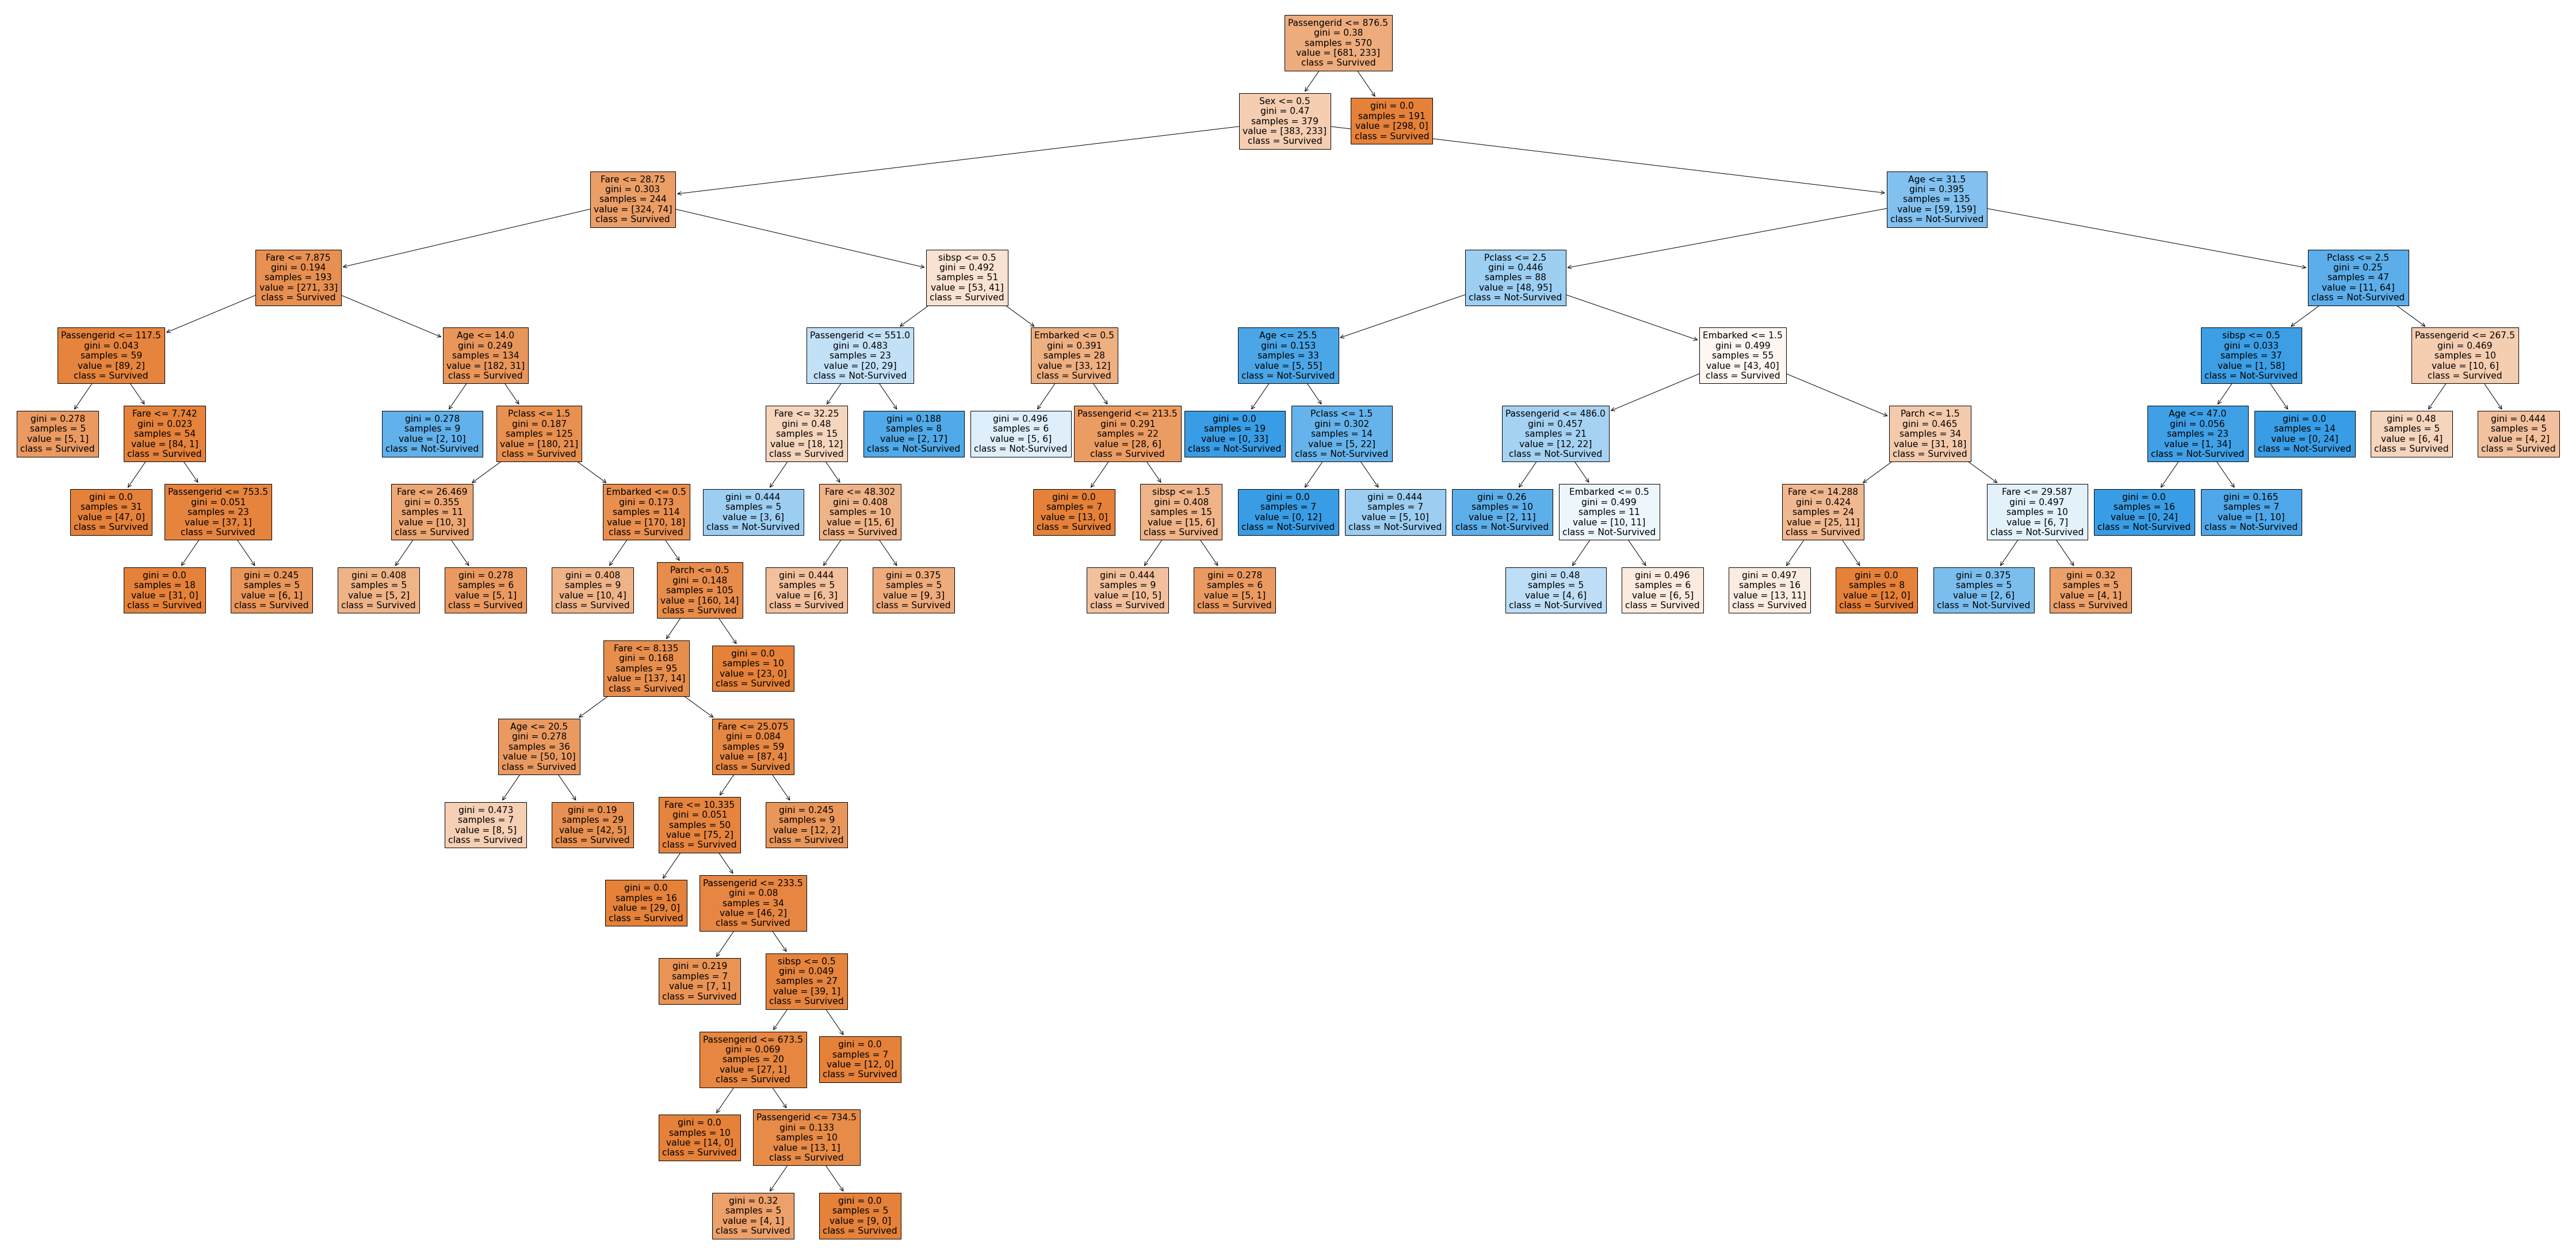

In [ ]:
# Visualizing the decision tree with index 7 in the given random foresr

from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[7], feature_names = X.columns,class_names=['Survived', "Not-Survived"],filled=True);

In [ ]:

rf_best.feature_importances_

array([0.37085321, 0.09445173, 0.15251653, 0.22231376, 0.02758363,
       0.025848  , 0.07981842, 0.02661472])

In [ ]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best.feature_importances_
})

In [ ]:
imp_df.sort_values(by="Imp", ascending=False)


,Varname,Imp
0,Passengerid,0.370853
3,Sex,0.222314
2,Fare,0.152517
1,Age,0.094452
6,Pclass,0.079818
4,sibsp,0.027584
7,Embarked,0.026615
5,Parch,0.025848


**Random Search for Hyperparameter Finetuning**

In [ ]:
from scipy.stats import randint

rs_space={'max_depth':list(np.arange(10, 100, step=10)) + [None],
              'n_estimators':np.arange(10, 500, step=50),
              'max_features':randint(1,7),
              'criterion':['gini','entropy'],
              'min_samples_leaf':randint(1,4),
              'min_samples_split':np.arange(2, 10, step=2)
         }

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestClassifier(random_state=42, n_jobs=-1)

rf_random = RandomizedSearchCV(rf, rs_space, n_iter=50, scoring='accuracy', n_jobs=-1, cv=4)

In [ ]:
%%time 
model_random = rf_random.fit(X_train, y_train)

CPU times: user 2.58 s, sys: 150 ms, total: 2.73 s
Wall time: 1min 33s


In [ ]:
model_random.best_params_

{'criterion': 'entropy',
 'max_depth': 60,
 'max_features': 6,
 'min_samples_leaf': 1,
 'min_samples_split': 8,
 'n_estimators': 260}

In [ ]:
model_random.best_score_

0.8840257029035471

In [ ]:
rf_best1 = model_random.best_estimator_
rf_best1

RandomForestClassifier(criterion='entropy', max_depth=60, max_features=6,
                       min_samples_split=8, n_estimators=260, n_jobs=-1,
                       random_state=42)

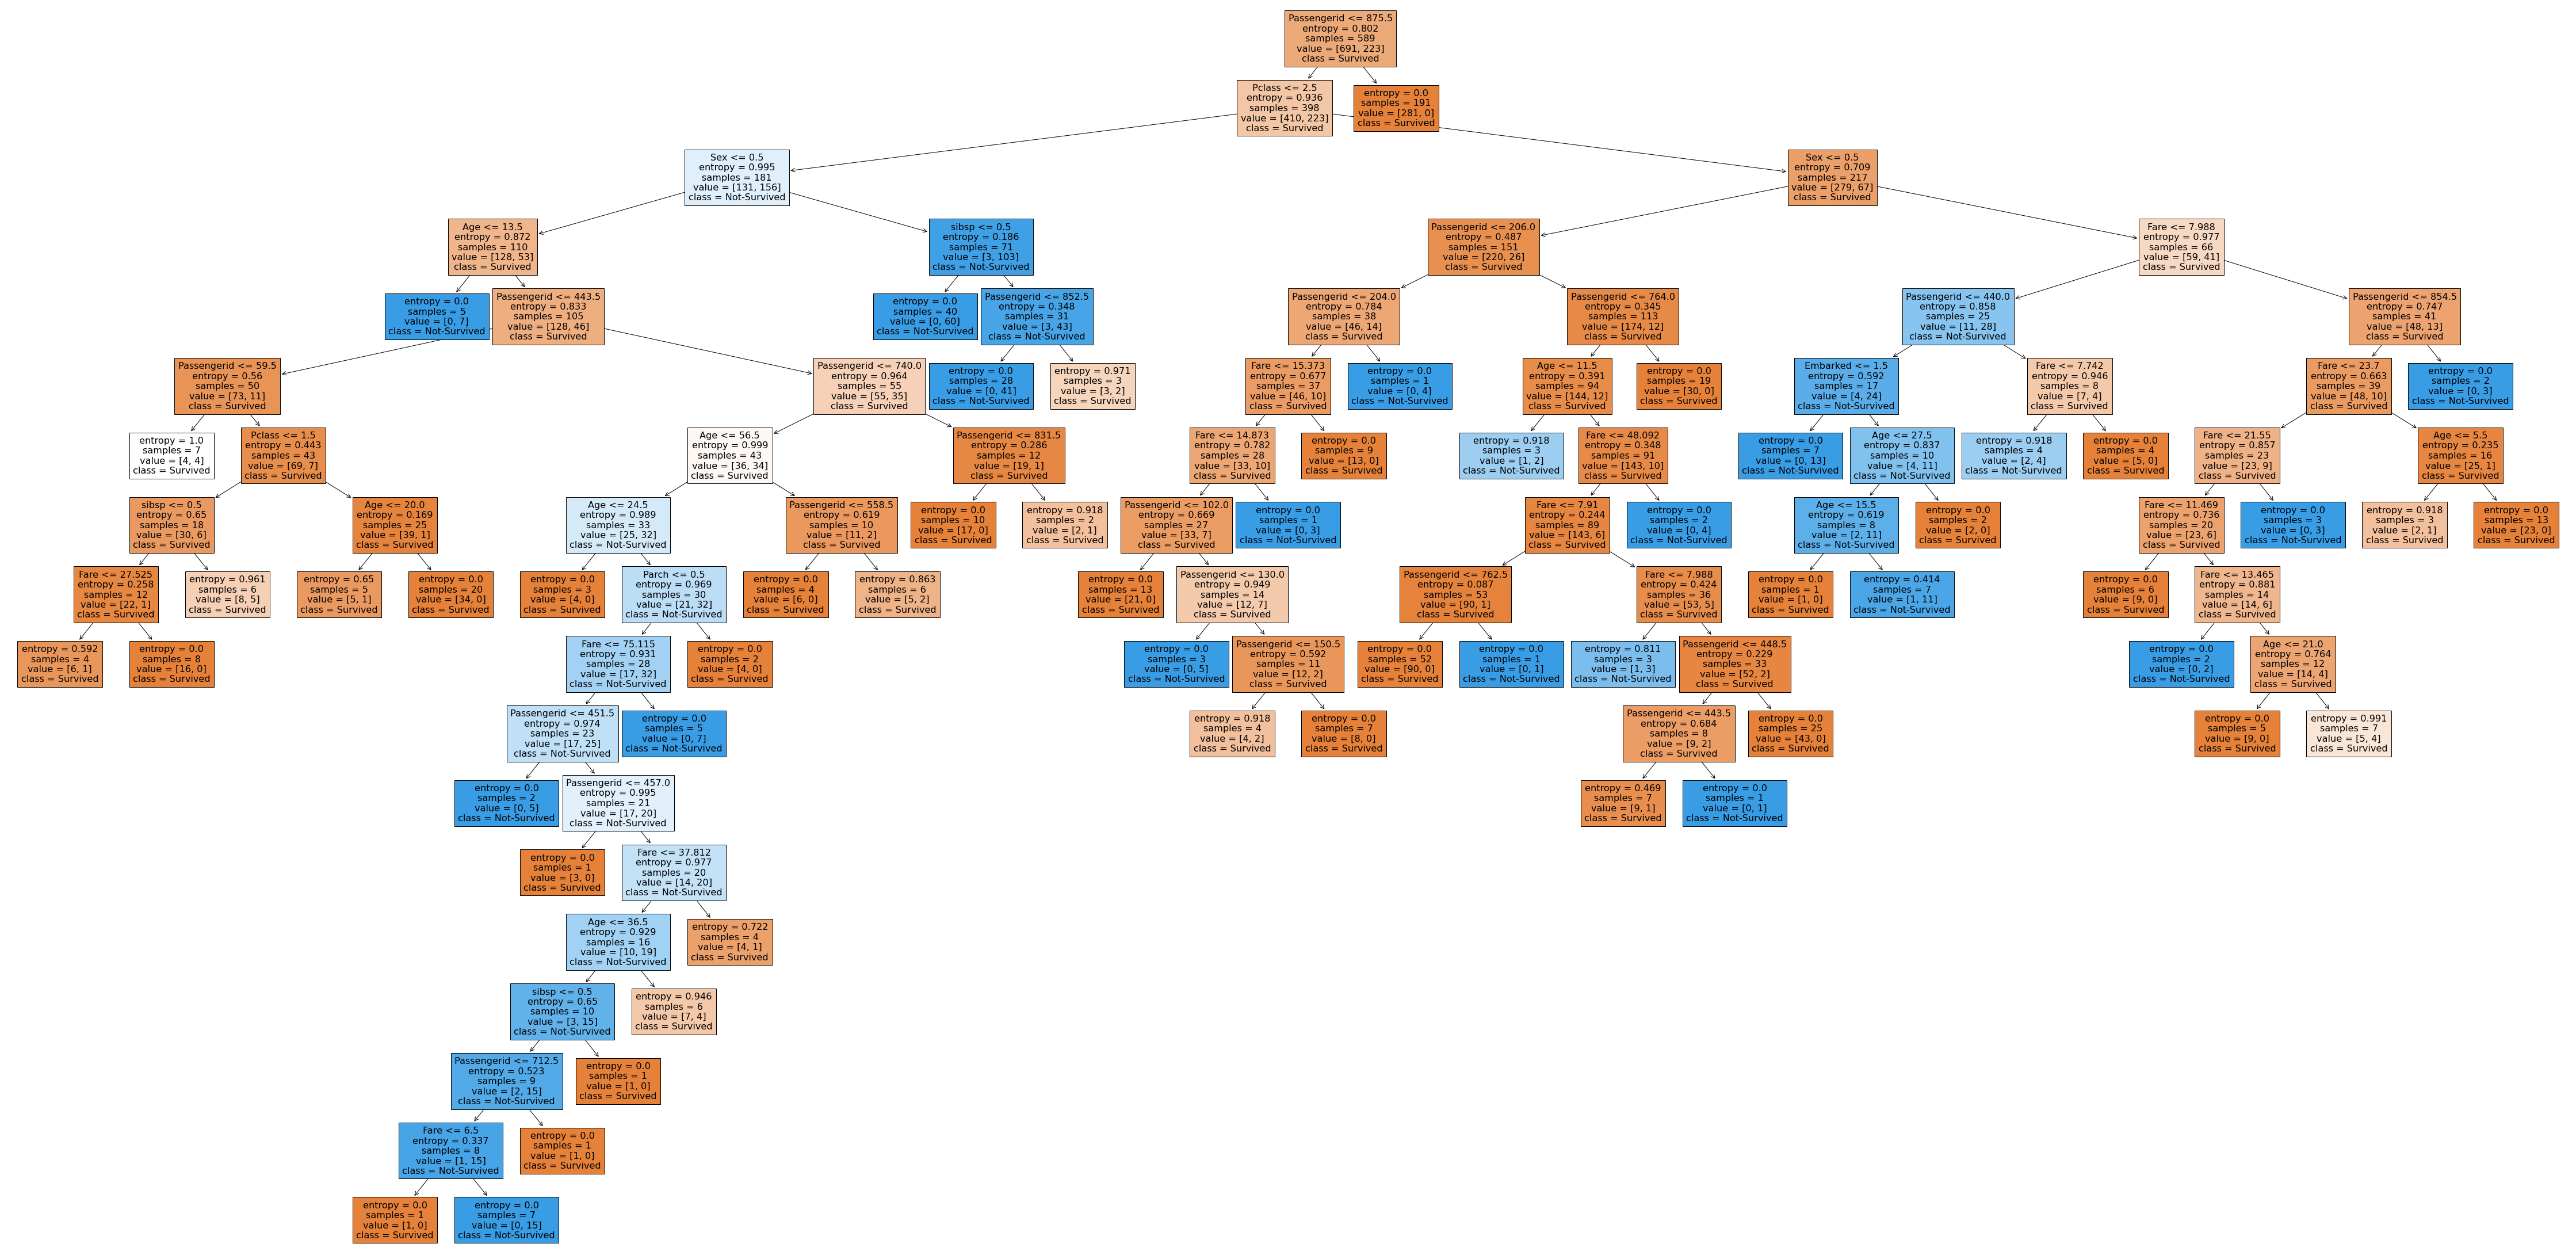

In [ ]:
# Visualizing the decision tree with index 5 in the given random foresr

from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rf_best1.estimators_[9], feature_names = X.columns,class_names=['Survived', "Not-Survived"],filled=True);

**Normal RF Vs. GridSearch RF Vs. RandomSearch RF**

In [ ]:

from sklearn.metrics import confusion_matrix

y_pred = rf_best.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
cm

array([[268,   9],
       [ 50,  66]])

Text(69.0, 0.5, 'Truth')

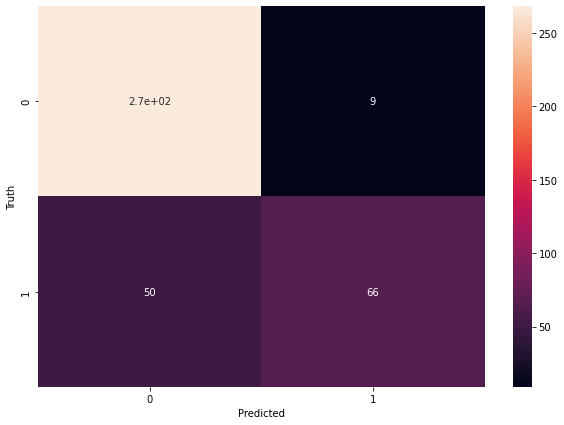

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:


from sklearn.metrics import confusion_matrix

y_pred1 = rf_best1.predict(X_test)

cm1 = confusion_matrix(y_test, y_pred)
cm1

array([[268,   9],
       [ 50,  66]])

Text(69.0, 0.5, 'Truth')

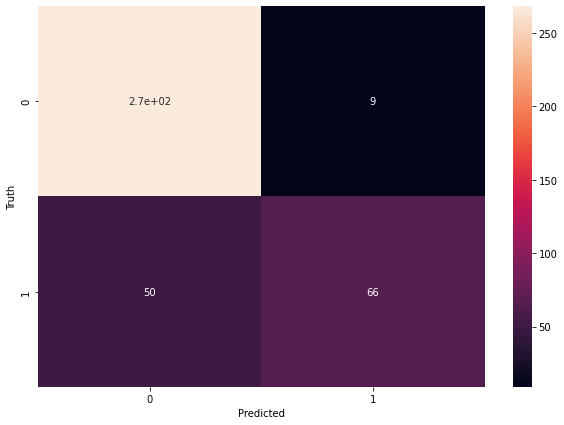

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(cm1, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
# Classification Report (Model Picked through GridSearch)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90       277
           1       0.88      0.57      0.69       116

    accuracy                           0.85       393
   macro avg       0.86      0.77      0.80       393
weighted avg       0.85      0.85      0.84       393



In [ ]:
# Classification Report (Model Picked through RandomSearch)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.85      0.95      0.89       277
           1       0.82      0.59      0.68       116

    accuracy                           0.84       393
   macro avg       0.83      0.77      0.79       393
weighted avg       0.84      0.84      0.83       393



In [ ]:
# Model (Original Model) Validation

y_pred2 = classifier_rf.predict(X_test)

cm2 = confusion_matrix(y_test, y_pred2)
cm2

array([[270,   7],
       [ 57,  59]])

Text(69.0, 0.5, 'Truth')

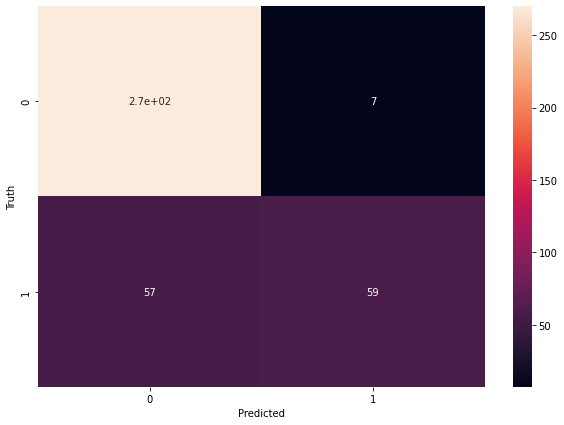

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(cm2, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

**Exercise:** Solve the classification problem for the Titanic toy dataset with Random Forest ensemble in the following fashion and report the best possible result. 
1. Train and test a baseline model with values for parameters to be default or something filled by you as standard ones.

2. Perform grid search to understand and find the best model.

3. Perform randome search to understand and find the best model.

4. Compare - Baseline Vs. GridSearch Model Vs. RandomSearch Model